#Facial Emotion Recognition

###Using Fer2013 Dataset

**Extracting Zipfile** 

In [0]:
from zipfile import ZipFile
fname="fer2013.zip"
with ZipFile(fname,'r') as zip:
  zip.extractall()
print("done")
  

done


**Keras CNN Model**

In [0]:
#Importing Libraries

import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

#GPU Configuration Setting
config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': 56} ) #max: 1 gpu, 56 cpu
sess = tf.Session(config=config) 
keras.backend.set_session(sess)


#setting Variables
num_classes = 7 
batch_size = 256
epochs = 25


#Reading FER csv File
with open("fer2013.csv") as f:
  content = f.readlines()

lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))


x_train, y_train, x_test, y_test = [], [], [], []

#Getting Training Data
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")
          
        val = img.split(" ")
            
        pixels = np.array(val, 'float32')
        
        emotion = keras.utils.to_categorical(emotion, num_classes)
    
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
      print("", end="")


      
#setting datatype
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')


#Normalization of data
x_train /= 255 
x_test /= 255


#reshaping Data Size
x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


#implementing Sequential layer
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))



gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)


model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])



#model fitting
fit = True

if fit == True:
	
	model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=25) #train for randomly selected one

  
  def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

Using TensorFlow backend.


number of instances:  35888
instance length:  2304


W0709 15:06:35.443060 139819083454336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0709 15:06:35.449399 139819083454336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0709 15:06:35.464488 139819083454336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0709 15:06:35.498082 139819083454336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0709 15:06:35.533171 139819083454336 deprecation_wrapp

28709 train samples
3589 test samples


W0709 15:06:35.698503 139819083454336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0709 15:06:35.712188 139819083454336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0709 15:06:35.851777 139819083454336 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/25
256/256 [==============================] - 462s 2s/step - loss: 1.7987 - acc: 0.2539
Epoch 2/25
256/256 [==============================] - 456s 2s/step - loss: 1.6027 - acc: 0.3602
Epoch 3/25
256/256 [==============================] - 460s 2s/step - loss: 1.4335 - acc: 0.4436
Epoch 4/25
256/256 [==============================] - 470s 2s/step - loss: 1.3179 - acc: 0.4946
Epoch 5/25
256/256 [==============================] - 462s 2s/step - loss: 1.2241 - acc: 0.5326
Epoch 6/25
256/256 [==============================] - 455s 2s/step - loss: 1.1489 - acc: 0.5629
Epoch 7/25
256/256 [==============================] - 473s 2s/step - loss: 1.0887 - acc: 0.5878
Epoch 8/25
256/256 [==============================] - 471s 2s/step - loss: 1.0278 - acc: 0.6094
Epoch 9/25
256/256 [==============================] - 469s 2s/step - loss: 0.9633 - acc: 0.6365
Epoch 10/25
256/256 [==============================] - 469s 2s/step - loss: 0.8961 - acc: 0.6620
Epoch 11/25
256/256 [==================

In [0]:
model.save('model25.h5')

In [0]:
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.10076207891049511
Train accuracy: 96.90341008046258
Test loss: 2.7256046003802434
Test accuracy: 56.86820841501535


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
 
pred_list = []; actual_list = []
predictions=model.predict(x_test)
for i in predictions:
 
  pred_list.append(np.argmax(i))
for i in y_test:
 
  actual_list.append(np.argmax(i))
confusion_matrix(actual_list, pred_list)

array([[242,   3,  51,  34,  66,  13,  58],
       [ 20,  27,   4,   1,   3,   0,   1],
       [ 72,   3, 201,  25,  99,  33,  63],
       [ 47,   0,  30, 670,  59,  16,  73],
       [ 92,   6,  81,  50, 287,  14, 123],
       [ 17,   0,  38,  23,  16, 305,  16],
       [ 71,   1,  48,  57, 112,   9, 309]])

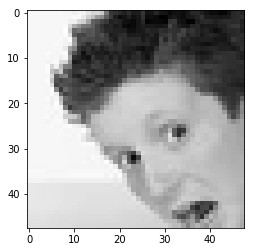

[5.6429273e-01 2.7950993e-08 4.6093170e-02 3.8848063e-01 3.3363864e-05
 1.1002145e-03 6.8005432e-09]


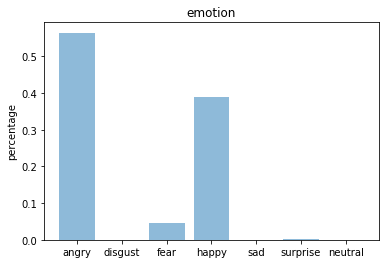

----------------------------------------------


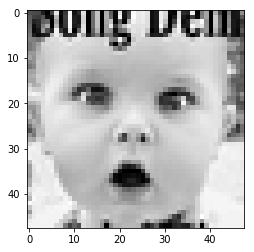

[4.6995245e-07 2.4339280e-16 4.2595630e-08 1.6712430e-09 6.5844318e-15
 9.9999952e-01 7.5309581e-10]


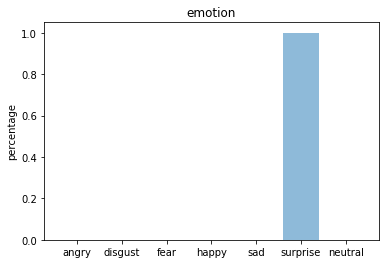

----------------------------------------------


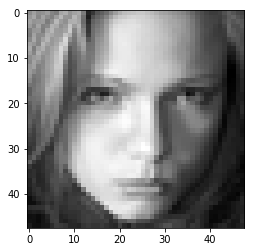

[8.4644702e-04 6.9430762e-20 4.6791359e-07 1.5157942e-10 2.3060955e-05
 2.7698996e-20 9.9913007e-01]


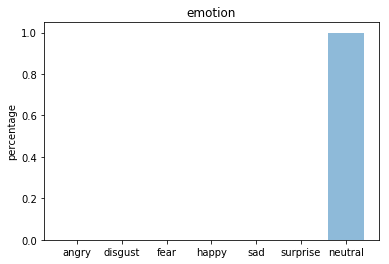

----------------------------------------------


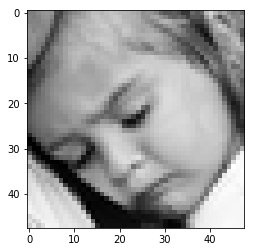

[5.3008504e-11 1.4183169e-24 6.6162270e-01 7.1368841e-11 3.3810142e-01
 4.0201320e-23 2.7583283e-04]


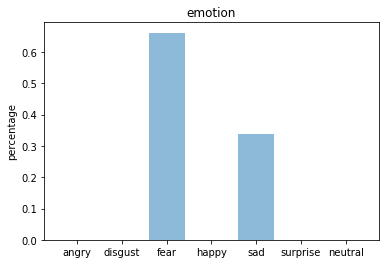

----------------------------------------------


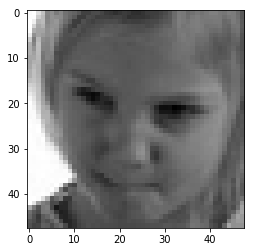

[9.9312770e-01 3.0443512e-06 4.5139618e-06 2.6895836e-04 6.5149348e-03
 1.1697505e-08 8.0897706e-05]


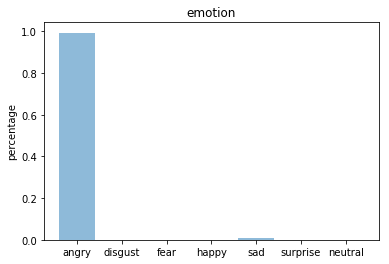

----------------------------------------------


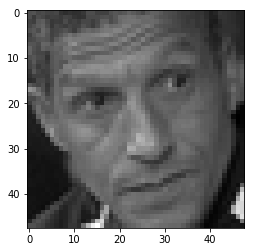

[7.3867500e-01 7.1631905e-07 9.1699712e-02 2.1573476e-05 1.6802762e-01
 4.5300528e-08 1.5752629e-03]


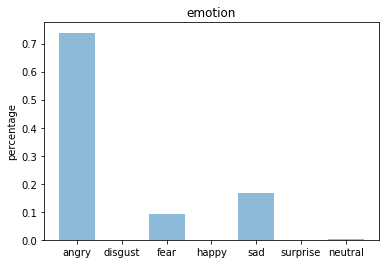

----------------------------------------------


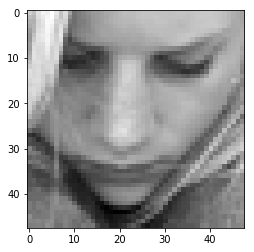

[7.2185327e-07 5.1333349e-10 1.3359804e-01 1.2880952e-04 8.6609936e-01
 1.3658378e-13 1.7303255e-04]


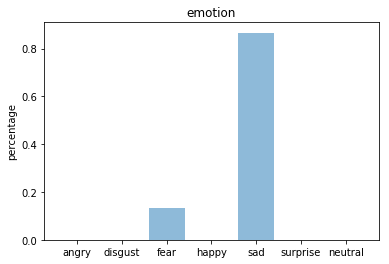

----------------------------------------------


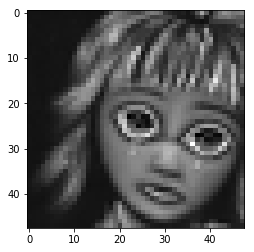

[1.0597561e-04 2.6208133e-10 1.0806853e-01 4.2109933e-02 1.2518135e-04
 8.3609897e-01 1.3491378e-02]


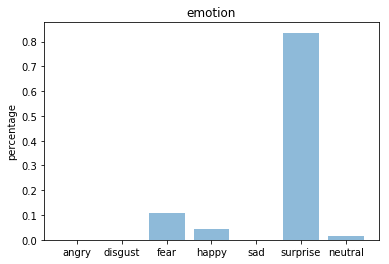

----------------------------------------------


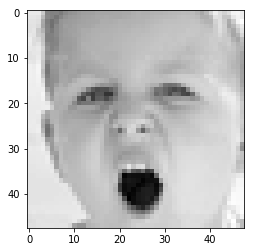

[7.5964332e-01 1.0364763e-09 2.8917072e-03 1.5598404e-08 2.3718223e-01
 2.5503157e-04 2.7677064e-05]


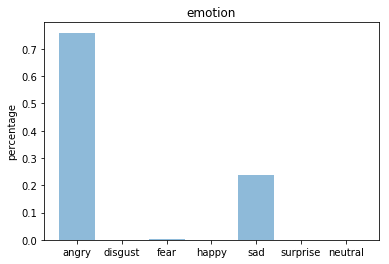

----------------------------------------------


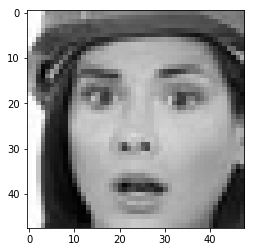

[1.5489398e-07 2.2502174e-20 2.0704338e-02 9.2610869e-13 1.1209097e-13
 9.7929549e-01 1.4393949e-20]


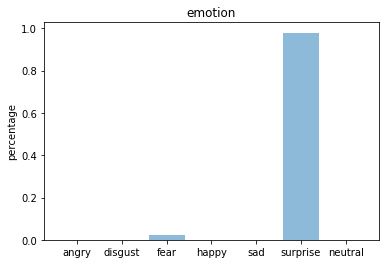

----------------------------------------------


In [0]:
monitor_testset_results = True

if monitor_testset_results == True:
	#make predictions for test set
	predictions = model.predict(x_test)

	index = 0
	for i in predictions:
		if index < 30 and index >= 20:
			#print(i) #predicted scores
			#print(y_test[index]) #actual scores
			
			testing_img = np.array(x_test[index], 'float32')
			testing_img = testing_img.reshape([48, 48]);
			
			plt.gray()
			plt.imshow(testing_img)
			plt.show()
			
			print(i)
			
			emotion_analysis(i)
			print("----------------------------------------------")
		index = index + 1

In [0]:
from keras.models import load_model
model = load_model('model25.h5')

In [0]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


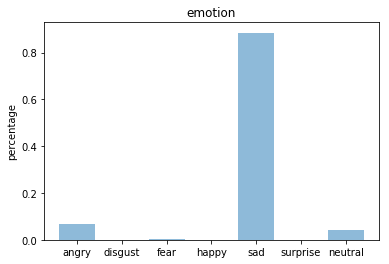

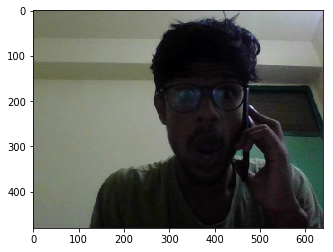

In [0]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = 'photo.jpg'
true_image = image.load_img(file)
img = image.load_img(file, grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(true_image)
plt.show()

In [0]:
import cv2
            
def facecrop(image):  
    facedata = "haarcascade_frontalface_default.xml"
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:
    
        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]

            
            cv2.imwrite('capture.jpg', sub_face)
            #print ("Writing: " + image)

    except Exception as e:
        print (e)

    #cv2.imshow(image, img)


if __name__ == '__main__':
    facecrop('1.jpg')

'NoneType' object has no attribute 'shape'


In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [0]:
take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'